In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_snapshot(filename):
    with open(filename, "rb") as f:
        # Read grid dimensions
        Nx, Ny = struct.unpack("ii", f.read(8))
        
        # Read simulation parameters
        dh, k0, k = struct.unpack("fff", f.read(12))
        fric_m, fric_s = struct.unpack("ff", f.read(8))
        
        size = Nx * Ny
        
        # Read float arrays
        f_el = np.frombuffer(f.read(4 * size), dtype=np.float32).reshape(Ny, Nx)
        f_drive = np.frombuffer(f.read(4 * size), dtype=np.float32).reshape(Ny, Nx)
        f_friction = np.frombuffer(f.read(4 * size), dtype=np.float32).reshape(Ny, Nx)
        
        # Read RNG state string
        (rng_len,) = struct.unpack("Q", f.read(8))
        rng_str = f.read(rng_len).decode("utf-8")

    return {
        "Nx": Nx,
        "Ny": Ny,
        "dh": dh,
        "k0": k0,
        "k": k,
        "fric_m": fric_m,
        "fric_s": fric_s,
        "f_el": f_el,
        "f_drive": f_drive,
        "f_friction": f_friction,
        "rng_state": rng_str  # optional: can ignore if unused
    }


In [3]:
snap = load_snapshot("firstrun.dat")

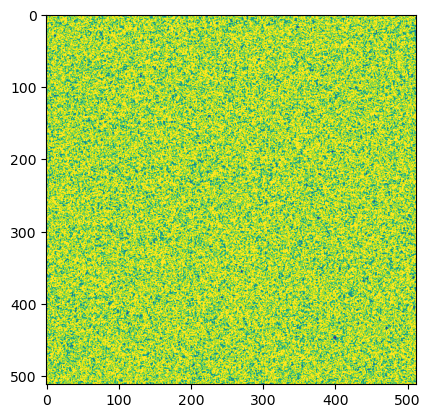

In [6]:
plt.imshow(snap['f_drive'])

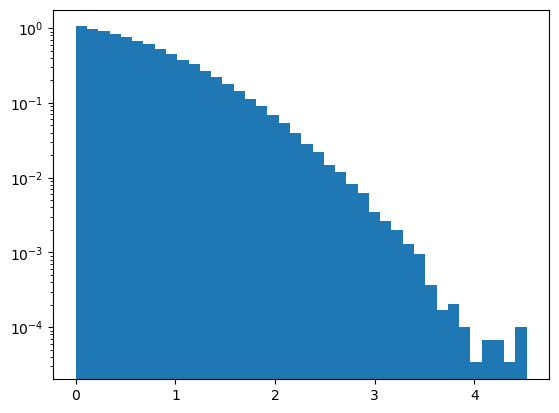

In [7]:
plt.hist((snap['f_friction'] - snap['f_drive'] - snap['f_el']).flatten(),bins=40, density=True)
plt.yscale('log')
plt.show()

In [9]:
data = np.loadtxt("firstrun.txt")

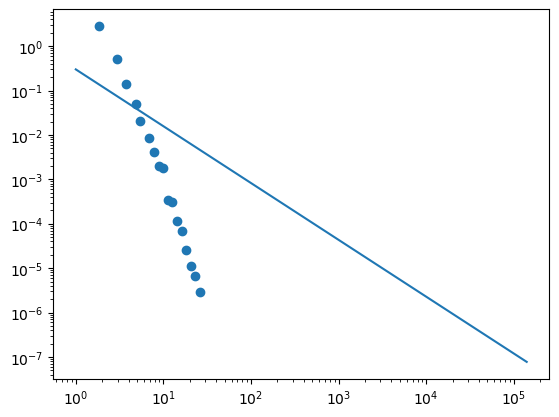

In [10]:
hist, edges = np.histogram(data, bins=np.logspace(0, 5.2,100), density=True)
plt.scatter(edges[:-1], hist)
plt.plot(edges[:-1], 0.3*edges[:-1]**(-1.28))
plt.xscale('log')
plt.yscale('log')
plt.show()